In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("project1.ipynb")

# Project 1: World Progress

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

**Project Instructions:**
- This project aims to synthesize the material we have covered in this course so far and assess the python and data wrangling skills you have all learned.  As such, **this project is to be completed on your own**. You may consult the text, your notes, your lab work, our lecture examples, and the web pages associated with the course web page, but no other sources for code are permitted.

    While we'd like you to answer the questions on your own, you may discuss these questions and review general concepts from the class materials with the course instructors and TAs.  We're happy to help you interpret error messages, offer debugging advice, review lecture and lab materials, etc.  Please do not discuss your code or solutions with others.
    
- **Due Date.** This project is due at **10pm on Thursday, Oct 27**. Do not wait until the last minute to complete this work.
- **Checkpoint.**  There is one intermediate checkpoint.  You must complete the first 8 questions, and pass the public autograder tests for those parts by **10pm on Sunday, Oct 23**.  Submitting this checkpoint is worth 5% of your entire project grade.  After you've submitted the checkpoint, you may still change your answers before the project deadline - only your final submission, to the Project 1 assignment, will be graded for correctness. 

**General Notebook Instructions:**
- Please complete this notebook by filling in the cells provided. 
- Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.  
- For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. 
- **Moreover, throughout this lab and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Reminders:**
- The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. This notebook shows exactly what is checked by the "public" tests in the <font color="indigo">purple list</font> at the end of each part.  Tests usually only check that your table has the correct column labels, for example. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).
- Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. For example, in Question 1 of the Global Poverty section we ask you to assign an answer to `latest`. Do not reassign the variable name `latest` to anything else in your notebook, otherwise there is the chance that our tests grade against what `latest` was reassigned to.

    You **never** have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!



In [3]:
# Run this cell to set up the notebook.

# These lines import the NumPy and Datascience modules.
from datascience import *
import numpy as np

# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## 1. Global Population Growth (85 pts)



The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>

In this part of the project, we will examine some of the factors that influence population growth and how they have been changing over the years and around the world. There are two main sub-parts of this analysis.

- First, we will examine the data for one country, Bangladesh. We will see how factors such as life expectancy, fertility rate, and child mortality have changed over time in Bangladesh, and how they are related to the rate of population growth.
- Next, we will examine whether the changes we have observed for Bangladesh are particular to that country or whether they reflect general patterns observable in other countries too. We will study aspects of world population growth and see how they have been changing.

The first table we will consider contains the total population of each country over time. Run the cell below.

In [65]:
population = Table.read_table('population.csv').where("time", are.below(2021))
population.show(3)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000


**Note:** The population csv file can also be found [here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv).

### Bangladesh

The nation of [Bangladesh](https://en.wikipedia.org/wiki/Bangladesh#People's_Republic_of_Bangladesh) was established as a parliamentary democracy after the Bangladesh Liberation War ended in 1971. The war-ravaged fledgling nation was almost immediately faced with floods and famine. In this section of the project, we will examine aspects of the development of Bangladesh since that time.

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Use the Alpha-3 link to find the 3-letter code for Bangladesh.

#### Part 1.1 (5 pts)


 Create a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2020 (including both 1970 and 2020) and the second should contain the population of Bangladesh in each of those years.



In [5]:
b_pop = population.where('geo', are.equal_to('bgd'))
b_pop = b_pop.drop('geo').where('time', are.between_or_equal_to(1970,2021))
b_pop

time,population_total
1970,64232486
1971,65531635
1972,66625706
1973,67637541
1974,68742222
1975,70066310
1976,71652386
1977,73463593
1978,75450033
1979,77529040


In [6]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* b_pop.labels == ('time', 'population_total')
* np.array_equal(b_pop.sort("time").column("time"), np.arange(1970, 2021))

</font>


Run the following cell to create a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

*Note:* You do not need to change or add anything to the cell below. 

In [7]:
b_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1970, 2021, 5) # 1970, 1975, 1980, ...
b_five = b_pop.sort('time').where('time', are.contained_in(fives))
b_five.show()

time,population_total
1970,"64,232,486"
1975,"70,066,310"
1980,"79,639,498"
1985,"90,764,180"
1990,"103,171,957"
1995,"115,169,933"
2000,"127,657,862"
2005,"139,035,505"
2010,"147,575,433"
2015,"156,256,287"


#### Part 1.2 (5 pts)


Let's write code to find the population growth rate. 

Assign `initial` to an array that contains the population for every five year interval from 1970 to 2015 (inclusive). Then, assign `changed` to an array that contains the population for every five year interval from 1975 to 2020 (inclusive). The first array should include both 1970 and 2015, and the second array should include both 1975 and 2020. You should use the `b_five` table to create both arrays, by first filtering the table to only contain the relevant years.

The annual growth rate for a time period is equal to:

$$(\frac{\text{Population at end of period}}{\text{Population at start of period}}^{\frac{1}{\text{number of years}}} )-1$$

We have provided the code below that uses  `initial` and `changed` in order to add a column to `b_five` called `annual_growth`. Don't worry about the calculation of the growth rates; run the test below to test your solution.

If you are interested in how we came up with the formula for growth rates, consult the [growth rates](https://inferentialthinking.com/chapters/03/2/1/Growth.html) section of the textbook.



In [8]:
initial = b_five.where('time', are.between_or_equal_to(1970,2015)).column('population_total')
changed = b_five.where('time', are.between_or_equal_to(1975,2020)).column('population_total')

b_1970_through_2015 = b_five.where('time', are.below_or_equal_to(2015)) 
b_five_growth = b_1970_through_2015.with_column('annual_growth', (changed/initial)**0.2-1)
b_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1970,"64,232,486",1.75%
1975,"70,066,310",2.59%
1980,"79,639,498",2.65%
1985,"90,764,180",2.60%
1990,"103,171,957",2.22%
1995,"115,169,933",2.08%
2000,"127,657,862",1.72%
2005,"139,035,505",1.20%
2010,"147,575,433",1.15%
2015,"156,256,287",1.06%


In [9]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* 0.005 <= b_five_growth.sort('time').column('annual_growth').item(0) <= 0.05
* 0.01 < max(b_five_growth.column('annual_growth')) < 0.03

</font>


While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2015. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [10]:
life_expectancy = Table.read_table('life_expectancy.csv').where('time', are.below(2021))
child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where('time', are.below(2021))
fertility = Table.read_table('fertility.csv').where('time', are.below(2021))

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as they will be helpful for answering further questions!

In [11]:
life_expectancy.show(3)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19


In [12]:
child_mortality.show(3)

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.58
afg,1801,468.58
afg,1802,468.58


In [13]:
fertility.show(3)

geo,time,children_per_woman_total_fertility
abw,1800,5.64
abw,1801,5.64
abw,1802,5.64


<!-- BEGIN QUESTION -->

#### Part 1.3 (5 pts)


Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.
 
*Note:* We are still focusing only on Bangladesh and no other countries at the moment. 

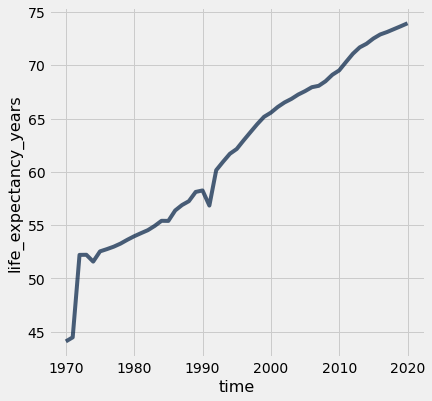

In [14]:
#Fill in code here
...
life_expectancy1 = life_expectancy.where('time', are.above_or_equal_to(1970)).where('geo', are.equal_to('bgd'))
life_expectancy1.plot('time','life_expectancy_years')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 1.4 (5 pts)


 Assuming everything else stays the same, do the trends in life expectancy in the graph above directly explain why the population growth rate decreased from 1985 to 2015 in Bangladesh? Why or why not? 

*Hint:* What happened in Bangladesh in 1991, and does that event explain the overall change in population growth rate? This [webpage](https://en.wikipedia.org/wiki/1991_Bangladesh_cyclone) provides relevant context.



<font color="red">
    
The trends in life expectancy in the graph above do not explain the population decrease, since as the years go by the life expectancy generally increases. Hpwever, in 1991 there is a sharp dip downwards in life expectancy and that is because of the 1991 Bangladesh cyclone, which is regarded as the "Fourth-deadliest tropical cyclone on record."
    
</font>

<!-- END QUESTION -->

#### Part 1.5 (5 pts)


The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

 Complete the function `fertility_over_time`. The function has inputs: 
 - `country_code`: an Alpha-3 code of a country
 - `start` year of the returned table (inclusive) 
 
The function returns a two-column table with labels `Year` and `Children per woman` with the country's fertility rate each year, starting at the `start` year (it should include all later years that appear in the `fertility` table). 

Below: 
1. Complete the function `fertility_over_time`
1. Assign `bangladesh_code` to a string that this the Alpha-3 code for Bangladesh
1. Use the provided code  to plot how Bangladesh's fertility rate has changed since 1970. **The expression that draws the line plot is provided for you; please don't change it.**

*Note:* The function `fertility_over_time` should not return the plot itself. 

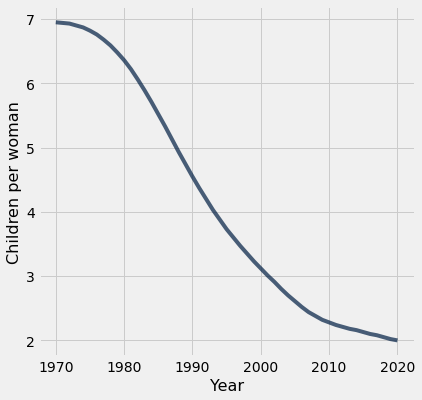

In [15]:
def fertility_over_time(country_code, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where('geo', country_code)
    country_fertility_after_start = country_fertility.where('time', are.above_or_equal_to(start))
    cleaned_table = country_fertility_after_start.relabel('time', 'Year').relabel('children_per_woman_total_fertility', 'Children per woman').drop('geo')
    # print(type(cleaned_table))
    return cleaned_table
    ...

bangladesh_code = 'bgd'
fertility_over_time(bangladesh_code, 1970).plot(0, 1) # You should *not* change this line.

In [16]:
grader.check("q1.5")

q1.5 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* fertility_over_time('usa', 2010).labels == ('Year', 'Children per woman')
* np.array_equal(fertility_over_time('usa', 2010).column('Year'), np.arange(2010, 2021))
* np.array_equal(fertility_over_time('usa', 2005).column('Year'), np.arange(2005, 2021))

</font>


<!-- BEGIN QUESTION -->

#### Part 1.6 (5 pts)


 Assuming everything else is constant, do the trends in fertility in the graph above help directly explain why the population growth rate decreased from 1980 to 2020 in Bangladesh? Why or why not?



<font color="red">
    
Because the fertility rates have a genral decreasing pattern from 1980 to 2020, this explains why the population growth also decreased during this time interval in Bangldesh. Generally, the higher the fertility rate is within a certain area, the larger the population size should be, and so a decreased fertility rate can account for a decreased population. 
    
</font>

<!-- END QUESTION -->

#### Part 1.7 (5 pts)


It has been [observed](https://www.ageing.ox.ac.uk/download/143) that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. In the reverse direction, having fewer children may allow families to devote more resources to each child, reducing child mortality. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

Using both the `fertility` and `child_mortality` tables, we will draw a scatter diagram that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis with one point for each year, starting with 1970.

**The code that draws the scatter diagram is provided for you; please don't change it.** 

Instead, create a table called `post_1969_fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. Use the label `Children per woman` to describe total fertility and the label `Child deaths per 1000 born` to describe child mortality.  Your table should also have a `time` column.

*Note*: Do not drop the `time` column or you will get an error in the scatterplot in the next cell!

/tmp/ipykernel_1670421/3619251878.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plots.colorbar()


time,Child deaths per 1000 born,Children per woman
1970,223.13,6.95
1971,222.36,6.94
1972,221.54,6.93
1973,220.49,6.9
1974,219.01,6.87
1975,217.02,6.82
1976,214.39,6.76
1977,211.11,6.68
1978,207.32,6.59
1979,203.15,6.48


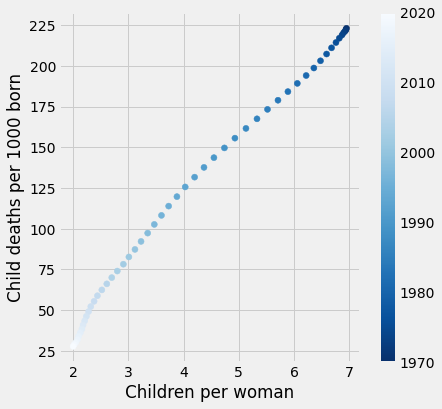

In [17]:
bgd_fertility = fertility.where('geo', are.equal_to('bgd')).where('time', are.above_or_equal_to(1970))
bgd_child_mortality = child_mortality.where('geo', are.equal_to('bgd')).where('time', are.above_or_equal_to(1970))

fertility_and_child_mortality = bgd_child_mortality.with_columns(bgd_fertility).drop('geo')
post_1969_fertility_and_child_mortality = fertility_and_child_mortality.relabel('child_mortality_under_5_per_1000_born','Child deaths per 1000 born').relabel('children_per_woman_total_fertility','Children per woman',)

# Don't change anything below this line!
x_births = post_1969_fertility_and_child_mortality.column("Children per woman")
y_deaths = post_1969_fertility_and_child_mortality.column("Child deaths per 1000 born")
time_colors = post_1969_fertility_and_child_mortality.column("time")

plots.figure(figsize=(6,6))
plots.scatter(x_births, y_deaths, c=time_colors, cmap="Blues_r")
plots.colorbar()                  
plots.xlabel("Children per woman")
plots.ylabel("Child deaths per 1000 born");
fertility_and_child_mortality

In [18]:
grader.check("q1.7")

q1.7 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* 'Child deaths per 1000 born' in post_1969_fertility_and_child_mortality.labels
* 'Children per woman' in post_1969_fertility_and_child_mortality.labels
* post_1969_fertility_and_child_mortality.num_rows == 51

</font>


The plot above uses **color** to encode data about the `time` column from the table `post_1969_fertility_and_child_mortality`. The colors, ranging from dark blue to white, represent the passing of time between the 1970s to the 2020s. For example, a point on the scatter plot representing data from the 1970s would appear as **dark blue** and a point from the 2010s would appear as **light blue**.


<!-- BEGIN QUESTION -->

#### Part 1.8 (5 pts)


 In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality *causes* parents to choose to have fewer children?



<font color="red">
    
In this graph, there seems to be a relationship between the fertility rates and the mortality rates over time. In eariler years, within the 1900s, both child mortality rates and fertility rates were at a high. However, in more recent years, especially after 2010s, there was both less fertility rates and child mortality rates. HOWEVER, we do not have enough information to say that a reduced child mortality CAUSES parents to have fewer children because they predict that much more of their children will survive. 
    
</font>

<!-- END QUESTION -->

### Checkpoint (due 10pm, Sunday, Oct 23)

Congratulations, you have reached the checkpoint!  Follow these steps to submit your work:
* Run the tests and verify that they pass as you expect, and that all images/graphs appear in the output.
* Choose **Save Notebook** from the **File** menu.
* **Run the following cell** and click the link below to download the zip file. 

Once you have downloaded that file, go to [Gradescope](https://www.gradescope.com/) and submit the zip file to the assignment is "Project 1 Checkpoint". **Be sure your work is saved before running the next cell!**

In [19]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=True)

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1960 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

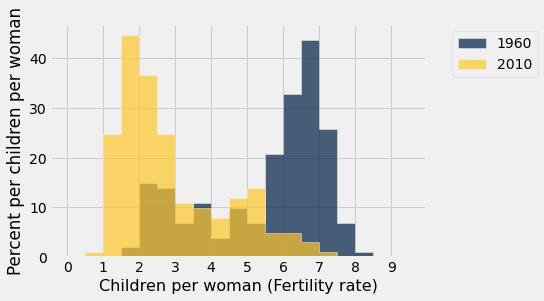

In [20]:
fertility_1960_2010 = Table().with_columns(
    '1960', fertility.where('time', 1960).column('children_per_woman_total_fertility'),
    '2010', fertility.where('time', 2010).column('children_per_woman_total_fertility')
)
fertility_1960_2010.hist(bins=np.arange(0, 10, 0.5), unit='child per woman')

plots.xlabel('Children per woman (Fertility rate)');
plots.ylabel('Percent per children per woman');
plots.xticks(np.arange(10));

#### Part 1.9 (4 pts)


Using the histogram above, please answer the following two questions:

1. In 2010, roughly what percent of countries had a fertility rate between 1.5 and 2?
2. In 1960, roughly what percent of countries had a fertility rate below 3?

Assign your answers to the variables `percent_2010` and `percent_1960` below.  They need not be exact, but simply a reasonable estimate based on you reading the histogram properly.

In [21]:
percent_2010 = 45
percent_1960 = 28

In [22]:
grader.check("q1.9")

q1.9 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* 0 <= percent_2010 <= 100
* 0 <= percent_1960 <= 100

</font>


<!-- BEGIN QUESTION -->

#### Part 1.10 (4 pts)


Describe the most striking distinction you see between fertility rates in 1960 and 2010?  In one or two sentences, quantify that distinction using the data presented in the histogram above.

<font color="red">
The most striking distinction I see is that in 1960s the fertility rate was mostly between 6.5 and 7 for the populations in the datat set whereas in 2010 the fertlity rate was drastically lower as it was between 1.5 and 2. 
</font>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 1.11 (5 pts)


 Draw a line plot of the world population from 1800 through 2020 (inclusive of both endpoints). The world population is the sum of all of the countries' populations. You should use the `population` table defined earlier in the project. 



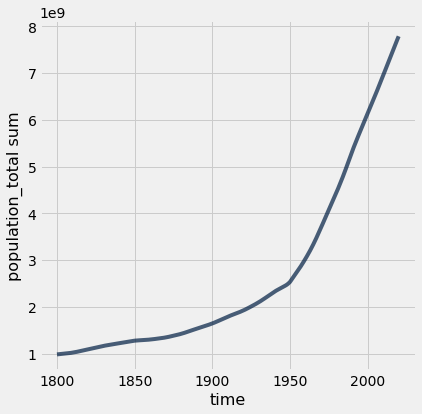

In [67]:
#Fill in code here
population1 = population.group('time',np.sum)
population1.plot('time','population_total sum')

time,count sum sum sum
1800,197
1801,197
1802,197
1803,197
1804,197
1805,197
1806,197
1807,197
1808,197
1809,197


<!-- END QUESTION -->

#### Part 1.12 (5 pts)


 Create a function `stats_for_year` that takes a `year` and returns a table of statistics. The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`, in that order. Each row should contain one unique Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. Only include rows for which all three statistics are available for the country and year.

In addition, restrict the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2020. This restriction will speed up computations later in the project.

After you write `stats_for_year`, try calling `stats_for_year` on any year between 1960 and 2020. Try to understand the output of stats_for_year.

*Hint*: The tests for this question are quite comprehensive, so if you pass the tests, your function is probably correct. However, without calling your function yourself and looking at the output, it will be very difficult to understand any problems you have, so try your best to write the function correctly and check that it works before you rely on the `grader` tests to confirm your work.

*Hint*: What do all three tables have in common (pay attention to column names)?



In [24]:
# We first create a population table that only includes the 
# 50 countries with the largest 2020 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', are.equal_to(2020)).sort("population_total", descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', are.equal_to(year)).drop('time')
    f = fertility.where('time', are.equal_to(year)).drop('time').where('geo', are.contained_in(big_50)).drop('geo')
    c = child_mortality.where('time', are.equal_to(year)).drop('time').where('geo', are.contained_in(big_50)).drop('geo')
    stats_for_year = p.with_columns(f).with_columns(c)
    return stats_for_year

stats_for_year(1960)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,8996967,7.45,356.9
ago,5454938,7.48,308.45
arg,20481781,3.11,73.28
bgd,48013505,6.73,260.24
bra,72179235,6.21,169.18
can,17847404,3.88,32.6
chn,660408054,3.99,308.99
cod,15248256,6,273.92
col,16057714,6.81,135.64
deu,73414229,2.4,40.47


In [25]:
grader.check("q1.12")

q1.12 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* stats_for_year(1990).labels == ('geo', 'population_total', 'children_per_woman_total_fertility', 'child_mortality_under_5_per_1000_born')
* stats_for_year(1990).num_rows == 50
* print(stats_for_year(1960).sort('geo').take(np.arange(5, 50, 5)))
* print(stats_for_year(2010).sort('geo').take(np.arange(3, 50, 5)))

</font>


#### Part 1.13 (5 pts)


In the next two question parts, we will build up to creating a table with the world population for the first year of each decade. 

First, create a helper function `pop_for_year` that computes the total population per year for all countries in the `big_50` table defined above. 

*Hint:* Your answer should use the `stats_for_year` function from the previous question.

In [26]:
def pop_for_year(year):
    """Return the total population for the specified year."""
    return sum(stats_for_year(year).column('population_total'))


In [27]:
grader.check("q1.13")

q1.13 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* pop_for_year(1972) == 3355562066
* pop_for_year(2020) == 6765161289
* pop_for_year(1989) == 4576679948
* pop_for_year(2002) == 5514129422

</font>


#### Part 1.14 (5 pts)


Now that you've defined your helper function, create a table called `pop_by_decade` with two columns called `decade` and `population`, in that order. 

The `pop_by_decade` table should have a row for each year that starts a decade, in increasing order starting with 1960 and ending with 2020. For example, 1960 is the start of the 1960's decade. 

The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. You should see that these countries contain most of the world's population.

*Hint:* `.apply()` might be helpful here. 

In [28]:
# Tabile with the years starting each decade
decades = Table().with_column('decade', np.arange(1960, 2021, 10))

pop_by_decade = decades.with_column('population', decades.apply(pop_for_year,decades))

pop_by_decade.set_format(1, NumberFormatter)  # Make the numbers have ,'s for readability.
pop_by_decade

/opt/tljh/user/lib/python3.9/site-packages/datascience/tables.py:471: FutureWarning: column lists are deprecated; pass each as an argument
  warnings.warn(


decade,population
1960,"2,635,123,897"
1970,"3,221,457,416"
1980,"3,890,044,418"
1990,"4,656,339,803"
2000,"5,377,062,169"
2010,"6,064,674,132"
2020,"6,765,161,289"


In [29]:
grader.check("q1.14")

q1.14 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* pop_by_decade.labels == ('decade', 'population')
* pop_by_decade.column(0).item(0) == 1960

</font>


The `countries` table below describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [30]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
ago,Angola,sub_saharan_africa
alb,Albania,europe_central_asia
and,Andorra,europe_central_asia
are,United Arab Emirates,middle_east_north_africa
arg,Argentina,america
arm,Armenia,europe_central_asia
atg,Antigua and Barbuda,america
aus,Australia,east_asia_pacific
aut,Austria,europe_central_asia


#### Part 1.15 (5 pts)


 Create a table called `region_counts`. It should contain two columns called `region` and `count`. The `region` column should contain regions of the world, and the `count` column should contain the number of countries in each region that appears in the result of `stats_for_year(2020)`. 

For example, one row would have `south_asia` as its `region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 2020.

*Hint*: You may have to relabel a column to name it `region`. 



In [31]:
def geo_region_convert(geo):
    region = countries.where('country', are.equal_to(geo))[17][0]
    return region
stats_for_2020 = stats_for_year(2020)
region_counts = stats_for_2020.with_columns('region',stats_for_2020.apply(geo_region_convert,'geo')).group('region')


region_counts

region,count
america,8
east_asia_pacific,9
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,11


In [32]:
grader.check("q1.15")

q1.15 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* region_counts.labels == ('region', 'count')
* sum(region_counts.column('count')) == 50

</font>


The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. Run the cell. Do you think you can identify any of the dots?

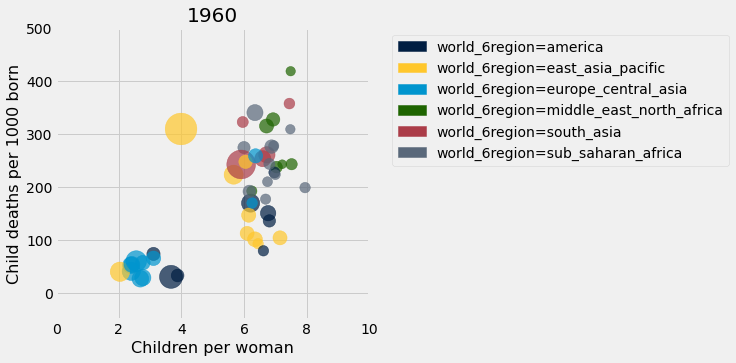

In [33]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    stats = stats_for_year(year)
    stats = stats.relabel('children_per_woman_total_fertility', 'Children per woman')
    stats = stats.relabel('child_mortality_under_5_per_1000_born', 'Child deaths per 1000 born')
    return stats

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter('Children per woman', 
                        'Child deaths per 1000 born', 
                        sizes='population_total', 
                        group='world_6region', 
                        s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)
    plots.show()

fertility_vs_child_mortality(1960)

<!-- BEGIN QUESTION -->

#### Part 1.16 (3 pts)


As a whole, which region had the lowest child mortality rate?  Justify your answer in one sentence using the scatter plot above.

<font color="red">
    The region "europe-central-asia" had the lowest child mortality rate because as shown in the scatter plot above, most of its points are clustered around a rate of less 100 for child morality, which is the y-axis, "child deaths per 1000 born," on this graph. 

    
</font>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 1.17 (3 pts)


Complete this statement: "Most regions have a fertility rate above ...".  Justify your answer in one sentence using the scatter plot above.

<font color="red">
    
Most regions have a fertility rate above about 5, as much of the clustering of points for various regions is around 6 and above. 
</font>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 1.18 (3 pts)


Is there any association between child mortality and fertility? Why? Is it causal?

<font color="red">
Yes, there is a positive relationship between child mortality and fertility as countries with higher fertility rates generally also have higher child mortality rates than countries with low fertility rates. HOWEVER, we do not have enough information to know that this is causal.
    
</font>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part 1.19 (3 pts)


Is there any relationship between the largest countries by population and the child mortality rates?  Justify your answer in one sentence using the scatter plot above.

<font color="red">
    
There is no relationship apparent on the plot because the dots regardless of the size are scattered and certain sizes do not show a trend to be clustered in a particular area more than others. 
    
</font>

<!-- END QUESTION -->

### Visualizing Changes Over Time

The result of the cell below is interactive. Drag the slider to the right to see how countries have changed over time. You'll find that the great divide between so-called "Western" and "developing" countries that existed in the 1960's has nearly disappeared. This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries.

**Note:** Don't worry if a red warning pops up when running the cell below. You'll still be able to run the cell!

In [34]:
import ipywidgets as widgets

_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2020, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2020, min=1960), Output()), _dom_classes=(…

Now is a great time to take a break and watch the same data presented by [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) with smoother animation and witty commentary.

## 2. Global Poverty (30 pts)



In 1800, 85% of the world's 1 billion people lived in [extreme poverty](https://en.wikipedia.org/wiki/Extreme_poverty), defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." At the time when the data in this project were gathered, a common definition of extreme poverty was a person living on less than \$1.25 a day.

In 2018, the proportion of people living in extreme poverty was estimated to be [about 9\%](https://unstats.un.org/sdgs/report/2019/goal-01/). Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still over 600 million. The United Nations adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere." In this part of the project we will examine aspects of global poverty that might affect whether the goal is achievable.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [35]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
poverty = Table.read_table('poverty.csv')
poverty.show(3)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53


#### Part 2.1 (5 pts)


 Assign `latest_poverty` to a three-column table with one row for each country that appears in the `poverty` table. 
 - The first column should contain the 3-letter code for the country. 
 - The second column should contain the most recent year for which an extreme poverty rate is available for the country. 
 - The third column should contain the poverty rate in that year. 
 
**Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: It will be useful to keep in mind how ```group``` works: it searches the table from top to bottom, collecting values in the order in which they appear.  It then applies the aggregation function to an array containing those values in the order in which they were found.  Thus, the first item in the array passed to the aggregation function corresponds to the first row found that is part of the group being processed.  The `first` function may be helpful, provided you sort the table appropriately before grouping...

In [68]:
def sort1(geo, time): 
    return poverty.where('geo', are.equal_to(geo)).where('time', are.equal_to(time))[2][0]

latest_poverty = poverty.group('geo', max).drop('extreme_poverty_percent_people_below_125_a_day max')
latest_poverty= latest_poverty.with_columns('poverty',latest_poverty.apply(sort1, 'geo','time max'))
latest_poverty = latest_poverty.relabeled(0, 'geo').relabeled(1, 'time').relabeled(2, 'poverty_percent') # You should *not* change this line.

latest_poverty.show()


geo,time,poverty_percent
ago,2009,43.37
alb,2012,0.46
arg,2011,1.41
arm,2012,1.75
aus,2003,1.36
aut,2004,0.34
aze,2008,0.31
bdi,2006,81.32
bel,2000,0.5
ben,2012,51.61


In [37]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* latest_poverty.labels==('geo', 'time','poverty_percent')
* latest_poverty.num_rows == 145

</font>


#### Part 2.2 (5 pts)


 Using both `latest_poverty` and `population`, create a four-column table called `recent_poverty_total` with one row for each country in `latest_poverty`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

*Hint*: Our solution starts by creating a table `poverty_and_pop` containing three columns: the geo code, the population, and latest poverty rate.  You may find this useful, and you are always welcome to add any additional variables. 


In [38]:
initial =population.where('time', are.equal_to(2010)).drop('time')
poverty_and_pop = latest_poverty.drop('time').join('geo',initial)

recent_poverty_total = poverty_and_pop.with_column('poverty_total',np.round(poverty_and_pop.column('poverty_percent')* (poverty_and_pop.column('population_total')/100)))

recent_poverty_total.labels
recent_poverty_total

geo,poverty_percent,population_total,poverty_total
ago,43.37,23356247,1.01296e+07
alb,0.46,2948029,13561
arg,1.41,40895751,576630
arm,1.75,2877314,50353
aus,1.36,22154687,301304
aut,0.34,8409945,28594
aze,0.31,9032465,28001
bdi,81.32,8675606,7.055e+06
bel,0.5,10938735,54694
ben,51.61,9199254,4.74774e+06


In [39]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* recent_poverty_total.labels==('geo', 'poverty_percent','population_total','poverty_total')
* recent_poverty_total.where('geo',are.equal_to('aus')).column('population_total').item(0) == 22154687
* np.isclose(recent_poverty_total.where('geo', 'aus').column('poverty_total').item(0), 301304)

</font>


#### Part 2.3 (5 pts)


 Assign the name `poverty_percent` to the known percentage of the world’s 2010 population that were living in extreme poverty. Assume that the `poverty_total` numbers in the `recent_poverty_total` table describe **all** people in 2010 living in extreme poverty. You should get a number that is above the 2018 global estimate of 9%, since many country-specific poverty rates are older than 2018.

*Hint*: Break this up into multiple lines to make it easier to debug.

*Hint*: The sum of the `population_total` column in the `recent_poverty_total` table is not the world population, because only a subset of the world's countries are included in the `recent_poverty_total` table (only some countries have known poverty rates). Use the `population` table to compute the world's 2010 total population.

*Hint*: We are computing a percentage (value between 0 and 100), not a proportion (value between 0 and 1).



In [40]:
pop2010 = sum(population.where('time', are.equal_to(2010)).column('population_total'))
pov2010sum = sum(recent_poverty_total.column('poverty_total'))
poverty_percent = (pov2010sum/pop2010)*100
poverty_percent

14.248865303997139

In [41]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* 10 <= poverty_percent <= 20

</font>


The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [42]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

country,name,world_4region,latitude,longitude
afg,Afghanistan,asia,33,66
ago,Angola,africa,-12.5,18.5
alb,Albania,europe,41,20
and,Andorra,europe,42.5078,1.52109
are,United Arab Emirates,asia,23.75,54.5
arg,Argentina,americas,-34,-64
arm,Armenia,europe,40.25,45
atg,Antigua and Barbuda,americas,17.05,-61.8
aus,Australia,asia,-25,135
aut,Austria,europe,47.3333,13.3333


#### Part 2.4 (5 pts)


 Using both `countries` and `recent_poverty_total`, create a five-column table called `poverty_map` with one row for every country in `recent_poverty_total`.  The five columns should have the following labels and contents:
1. `latitude` contains the country's latitude,
1. `longitude` contains the country's longitude,
1. `name` contains the country's name,
1. `region` contains the country's region from the `world_4region` column of `countries`,
1. `poverty_total` contains the country's poverty total.

*Hint:*  Be sure to put the columns in the order specified.  You may find it useful to remember that that a call to `table.select(...)` puts columns in the order that they are specified as parameters in the call to select.

In [43]:
poverty_map =countries.where('country', are.contained_in(recent_poverty_total.column('geo'))).select('latitude', 'longitude','name', 'world_4region').with_column('poverty_total',recent_poverty_total.column('poverty_total'))

poverty_map =poverty_map.relabel('world_4region', 'region')
poverty_map

latitude,longitude,name,region,poverty_total
-12.5,18.5,Angola,africa,1.01296e+07
41,20,Albania,europe,13561
-34,-64,Argentina,americas,576630
40.25,45,Armenia,europe,50353
-25,135,Australia,asia,301304
47.3333,13.3333,Austria,europe,28594
40.5,47.5,Azerbaijan,europe,28001
-3.5,30,Burundi,africa,7.055e+06
50.75,4.5,Belgium,europe,54694
9.5,2.25,Benin,africa,4.74774e+06


In [44]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* poverty_map.labels == ('latitude', 'longitude', 'name', 'region', 'poverty_total')
* list(np.sort(np.unique(poverty_map.column('region')))) == ['africa', 'americas', 'asia', 'europe']

</font>


Run the cell below to draw a map of the world in which the areas of circles represent the number of people living in extreme poverty. Double-click on the map to zoom in.

In [45]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_columns(
    'labels', poverty_map.column('name'),
    'colors', poverty_map.apply(colors.get, 'region'),
    'areas', 1e-4 * poverty_map.column('poverty_total')
).drop('name', 'region', 'poverty_total')

Circle.map_table(scaled)

Although people lived in extreme poverty throughout the world in 2010 (with more than 5 million in the United States), the largest numbers were in Asia and Africa.

#### Part 2.5 (5 pts)


 Assign `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.

*Hint*: How can we use `take` and `np.arange` in conjunction with each other?



In [46]:
largest = poverty_map.sort('poverty_total', descending= True).take(np.arange(0,10)).select('name', 'poverty_total')
largest.set_format('poverty_total', NumberFormatter)

name,poverty_total
India,"291,660,639.00"
Nigeria,"98,319,537.00"
China,"85,687,544.00"
Bangladesh,"63,826,375.00"
"Congo, Dem. Rep.","56,635,412.00"
Indonesia,"39,177,145.00"
Ethiopia,"32,242,742.00"
Pakistan,"22,858,700.00"
Tanzania,"19,281,872.00"
Madagascar,"18,543,643.00"


In [47]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<font color="indigo">

**Checks:** The grader only checks:
* largest.labels == ('name', 'poverty_total')
* largest.column('name').item(0) == 'India'
* largest.num_rows == 10

</font>


<!-- BEGIN QUESTION -->

#### Part 2.6 (5 pts)


It is important to study the absolute number of people living in poverty, not just the percent. The absolute number is an important factor in determining the amount of resources needed to support people living in poverty. 

To do that, we'll now write a function called `poverty_timeline` that takes **the name of a country** (not the geo code) as its argument. It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

*Hint:* To make your plot, you will first need to make a table.

*Hint:* This question is long. Feel free to create cells and experiment. You can create cells by going to the toolbar and hitting the `+` button.

In [48]:

def poverty_timeline(country):
    '''Draw a timeline of people living in extreme poverty in a country.'''
    geo = countries.where('name', are.equal_to(country)).column('country').item(0)
    # This solution will take multiple lines of code. Use as many as you need
    pop_data = population
    #filter geos
    table1 = poverty.where('geo', are.equal_to(geo))
    table2 = population.where('geo', are.equal_to(geo))
    
    table3 = table2.join('time',table1)
    
    table4 = table3.with_column('Population in poverty',table3.column('extreme_poverty_percent_people_below_125_a_day')*table3.column('population_total')).select('time', 'Population in poverty')
   
    table4.plot('time','Population in poverty')
    
    # Don't change anything below this line. 
    plots.title(country)
    plots.ylim(bottom=0)
    plots.show() # This should be the last line of your function. 


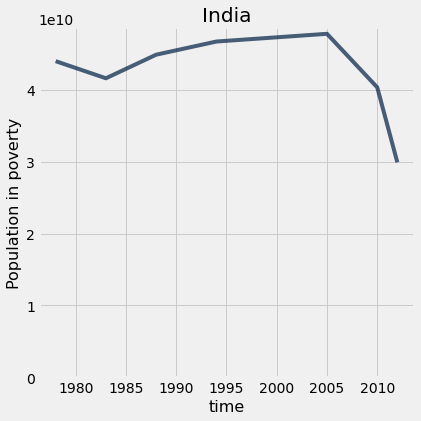

In [49]:
poverty_timeline('India')  # sample call

<!-- END QUESTION -->

Finally, draw the line plots below to see how the world is changing. Pay attention to the axes! You can check your work by comparing your graphs to the ones on [gapminder.org](https://www.gapminder.org/tools/#$state$entities$show$country$/$in@=ind;;;;&marker$axis_y$which=number_of_people_in_poverty&scaleType=linear&spaceRef:null;;;&chart-type=linechart).



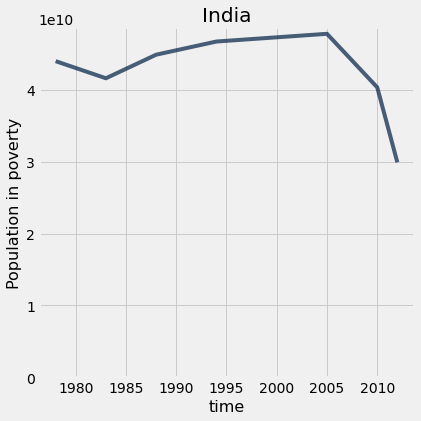

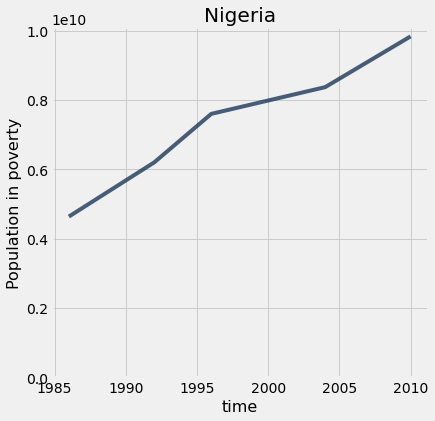

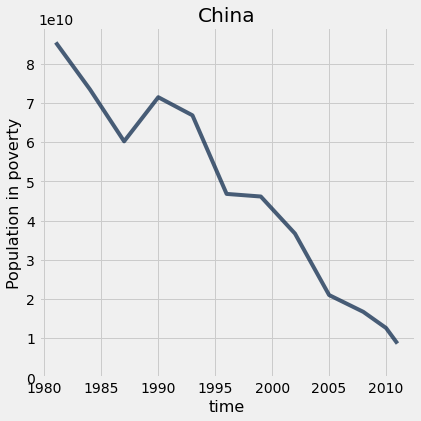

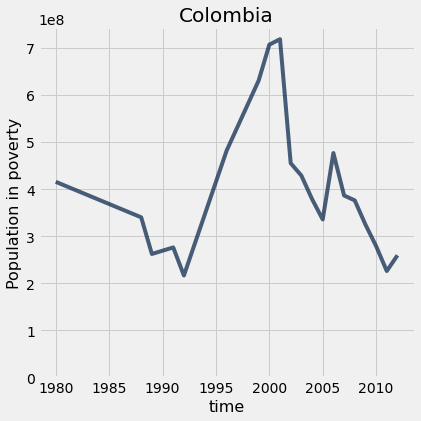

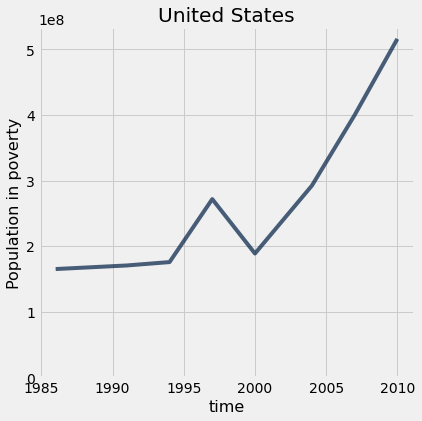

In [50]:
poverty_timeline('India')
poverty_timeline('Nigeria')
poverty_timeline('China')
poverty_timeline('Colombia')
poverty_timeline('United States')

Although the number of people living in extreme poverty increased in some countries including Nigeria and the United States, the decreases in other countries, most notably the massive decreases in China and India, have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

### Visualizing the Poverty Timeline in All Countries

Below, we've also added an interactive dropdown menu for you to visualize `poverty_timeline` graphs for other countries. Note that each dropdown menu selection may take a few seconds to run.

In [51]:
# Just run this cell

all_countries = poverty_map.column('name')
_ = widgets.interact(poverty_timeline, country=list(all_countries))

interactive(children=(Dropdown(description='country', options=('Angola', 'Albania', 'Argentina', 'Armenia', 'A…

## 3. You're Done!


Congratulations on discovering some important facts about global poverty and demonstrating your mastery of table manipulation and data visualization. Time to submit...

**Important submission information:** Follow these steps to submit your work:
* Run the tests and verify that they pass as you expect. 
* Choose **Save Notebook** from the **File** menu.
* **Run the final cell** and click the link below to download the zip file. 

Once you have downloaded that file, go to [Gradescope](https://www.gradescope.com/) and submit the zip file to the corresponding assignment. The name of this assignment is "Project 1". **Be sure your work is saved before running the last cell!**

Once you have submitted, your Gradescope assignment should show you passing all the tests you passed in your assignment notebook.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [52]:
grader.check_all()

q1.1 results: All test cases passed!

q1.12 results: All test cases passed!

q1.13 results: All test cases passed!

q1.14 results: All test cases passed!

q1.15 results: All test cases passed!

q1.2 results: All test cases passed!

q1.5 results: All test cases passed!

q1.7 results: All test cases passed!

q1.9 results: All test cases passed!

q2.1 results: All test cases passed!

q2.2 results: All test cases passed!

q2.3 results: All test cases passed!

q2.4 results: All test cases passed!

q2.5 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [53]:
# Save your notebook first, then run this cell to export your submission.
grader.export()